In [141]:
import pandas as pd

In [142]:
dataset_red=pd.read_csv("C:/Users/10253/Desktop/Machine-Learning-Project-Group-6/Data/红酒白酒分类+回归（都可以）/winequality-red.csv",sep=";",index_col=False)
dataset_white=pd.read_csv("C:/Users/10253/Desktop/Machine-Learning-Project-Group-6/Data/红酒白酒分类+回归（都可以）/winequality-white.csv",sep=";",index_col=False)


In [143]:
# dataset_red.head(n=len(dataset_red))
red=["red"]*len(dataset_red)
dataset_red.insert(0,"Label",red)
white=["white"]*len(dataset_white)
dataset_white.insert(0,"Label",white)
# dataset_white.head(n=5)
dataset=pd.concat([dataset_red,dataset_white],axis=0)
dataset.set_index("Label")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Label,,,,,,,,,,,,
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6


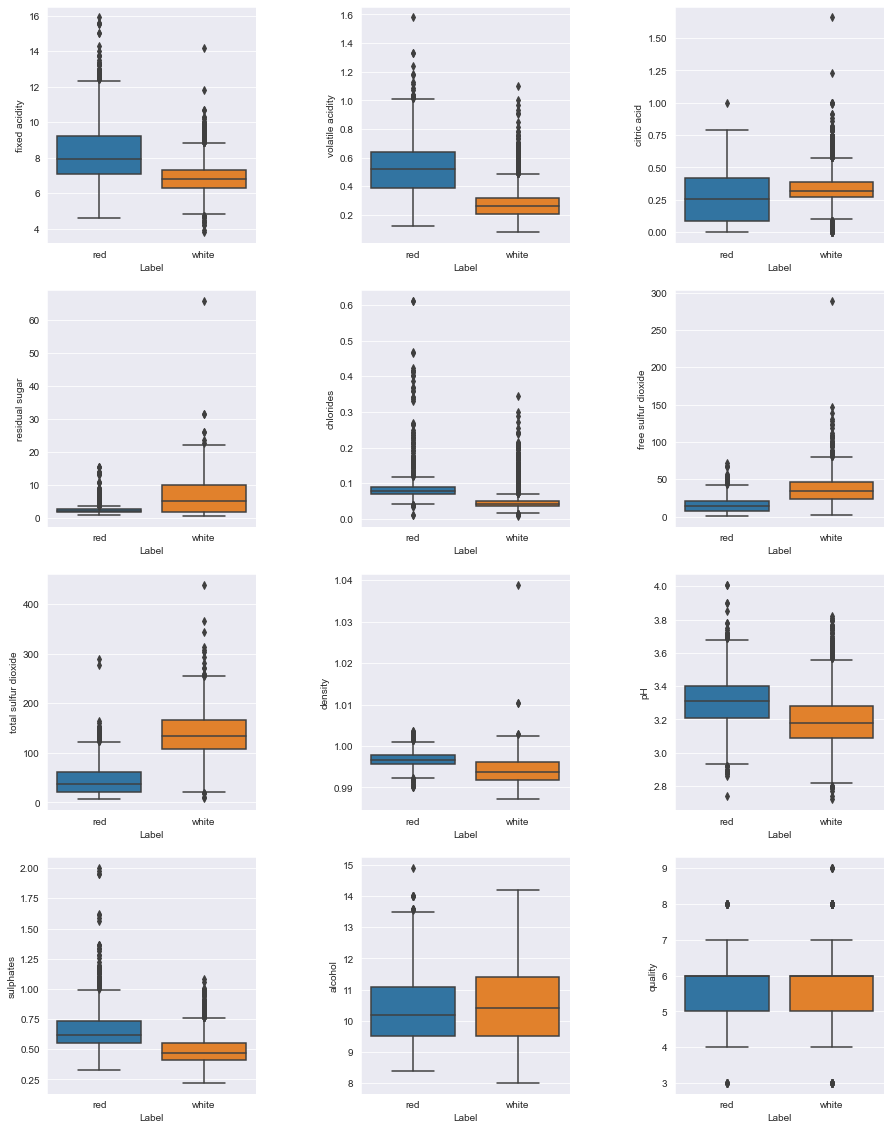

In [144]:
from matplotlib import pyplot as plt
import seaborn as sns
fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(15,20))
fig.subplots_adjust(hspace=0.2,wspace=.5)
axes=axes.ravel()

for i,col in enumerate(dataset.columns[1:]):
    _=sns.boxplot(y=col,x='Label',data=dataset,ax=axes[i])

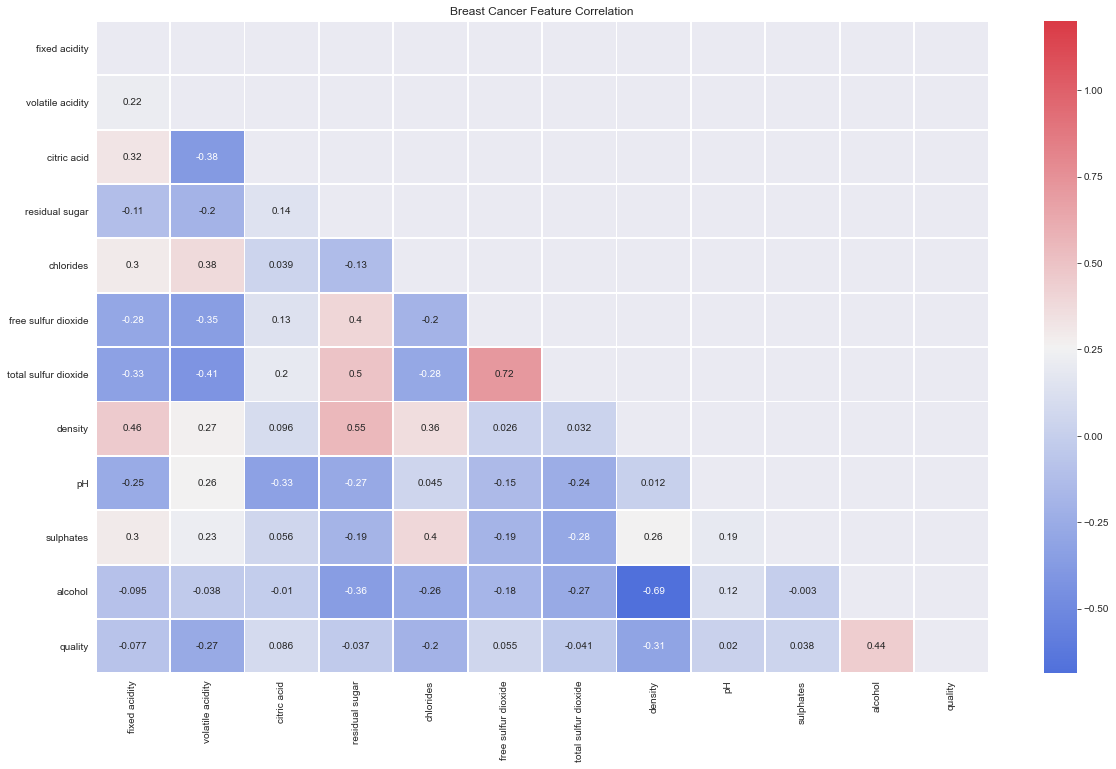

In [145]:
import numpy as np
corrMatt = dataset.corr()
# print(corrMatt)  相关矩阵

mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Breast Cancer Feature Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [146]:
X=dataset.drop("Label",axis=1)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xs=scaler.fit_transform(X)

In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Label"]=le.fit_transform(dataset["Label"])

y=dataset["Label"]

In [148]:
from sklearn.feature_selection import SelectKBest,f_classif
Xs=SelectKBest(f_classif,k=4).fit_transform(Xs,y)

In [149]:
from sklearn.model_selection import train_test_split

Xs_train,Xs_test,y_train,y_test=train_test_split(Xs,y,test_size=0.3,random_state=1,stratify=y)



In [150]:
from sklearn.svm import SVC

clf=SVC(C=1.0,kernel="rbf",degree=3,gamma='auto',probability=True)
clf.fit(Xs_train,y_train)

SVC(gamma='auto', probability=True)

In [151]:
classifier_score=clf.score(Xs_test,y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))


The classifier accuracy score is 0.99


In [152]:
from sklearn.metrics import accuracy_score
y_predict=clf.predict(Xs_test)
accuracy=accuracy_score(y_test,y_predict)

print(accuracy)

0.9897435897435898


# Next is for Decision Trees for both classification (using same dataset)

In [153]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.tree import DecisionTreeClassifier

clf_fs_cv=Pipeline(
    [('feature selector',SelectKBest(f_classif,k=4)),('decision trees',DecisionTreeClassifier(criterion="entropy",splitter="best"))]
)
score=cross_val_score(clf_fs_cv,Xs,y,cv=10)
print(score)

[0.98       0.98769231 0.97846154 0.99076923 0.97692308 0.98769231
 0.98153846 0.96302003 0.98921418 0.97996918]


# Next is using different dataset to do regression task

In [154]:
# dataset=pd.read_csv("C:/Users/10253/Desktop/Machine-Learning-Project-Group-6/Data/加速度计 regression/accelerometer.csv",sep=",",index_col=False)
dataset=pd.read_csv('C:/Users/10253/Desktop/Machine-Learning-Project-Group-6/Data/加速度计 regression/airfoil_self_noise.dat',sep="\t",engine='python',names=["Frequency","Angle","Chord","Velocity","Suction","Pressure Level"],header=None)

In [155]:
X=dataset.drop("Pressure Level",axis=1)

from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# Xs=scaler.fit_transform(X)
Xs=X

In [156]:
from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# dataset["Pressure Level"]=le.fit_transform(dataset["Pressure Level"])

y=dataset["Pressure Level"]
# y=y[:1000]

In [166]:
import sklearn
from sklearn import tree
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeRegressor
Xs_train,Xs_test,y_train,y_test=train_test_split(Xs,y)
regressor=Pipeline(
    [('decision trees',DecisionTreeRegressor(random_state=0))]
)
regressor.fit(Xs_train,y_train)
score=cross_val_score(regressor,Xs_train,y_train,cv=10,scoring="neg_mean_squared_error")
print(score.mean())
print(regressor.score(Xs_test,y_test))

-7.071898091498103
0.8618040010039194


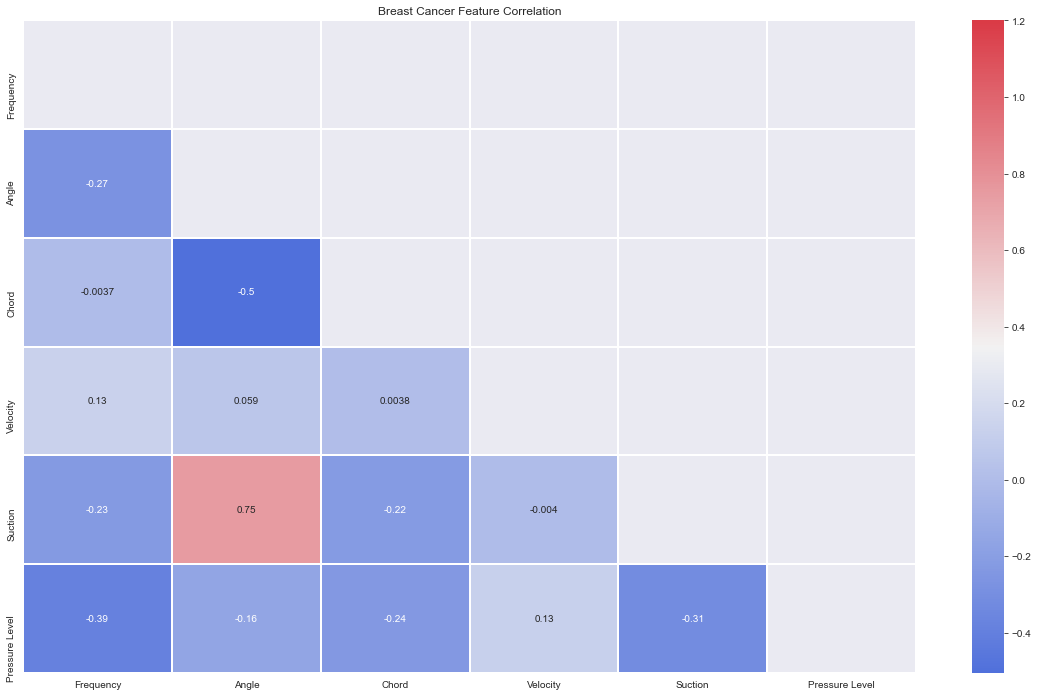

In [162]:
import numpy as np
corrMatt = dataset.corr()
# print(corrMatt)  相关矩阵

mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Breast Cancer Feature Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [159]:
from tensorflow import keras
from sklearn.preprocessing import Normalizer

Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=1)

normal=Normalizer()
Xs_train=normal.fit_transform(Xs_train)

Xs_test=normal.transform(Xs_test)

# y_train=normal.fit_transform(y_train.values.reshape(-1,1))
# y_test=normal.transform(y_test.values.reshape(-1,1))


model=keras.models.Sequential()
model.add(keras.layers.Dense(512,input_dim=len(dataset.columns)-1,activation="relu",use_bias=True))
model.add(keras.layers.Dense(210,activation="relu",use_bias=True))
model.add(keras.layers.Dense(320,activation="relu",use_bias=True))
model.add(keras.layers.Dense(1,use_bias=True))

model.compile(loss="mse",optimizer="adam")

history=model.fit(np.array(Xs_train),np.array(y_train),epochs=20,validation_data=(np.array(Xs_test),np.array(y_test)),verbose=1,batch_size=128)
score=model.evaluate(np.array(Xs_test),np.array(y_test),verbose=0)
# y_pred=model.predict(np.array(Xs_test))
print(score)

# y=list(y)
# y_pred=list(y_pred)
# print(y_pred)
# for i in range(len(y)):
#     print(y[i],",",end="")
#     print(y_pred[i])


Epoch 1/20
9/9 [==============================] - 0s 13ms/step - loss: 15552.6514 - val_loss: 15165.2764
Epoch 2/20
9/9 [==============================] - 0s 4ms/step - loss: 14928.8457 - val_loss: 13999.0459
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 13139.4980 - val_loss: 11062.6279
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 9173.8848 - val_loss: 5601.8564
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 3204.4099 - val_loss: 317.6022
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 339.0283 - val_loss: 938.6414
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 520.1035 - val_loss: 56.1677
Epoch 8/20
9/9 [==============================] - 0s 4ms/step - loss: 106.2624 - val_loss: 167.8438
Epoch 9/20
9/9 [==============================] - 0s 4ms/step - loss: 128.4158 - val_loss: 47.7710
Epoch 10/20
9/9 [==============================] - 0s 5ms/step - loss: 53.9252 - val_l